In [2]:
#Loading the dataframe
import pandas as pd
df_r = pd.read_csv("/content/drive/MyDrive/winequality/winequality-red.csv", sep=";")
df_w = pd.read_csv("/content/drive/MyDrive/winequality/winequality-white.csv", sep=";")

In [ ]:
#Loading first 5 rows for red wine
df_r.head(6)

In [ ]:
#loading first five rows for white wine
df_w.head(6)

In [ ]:
#investigating red wine data
df_r.info()

In [ ]:
#Investigating white wine data
df_w.info()

In [ ]:
#Checking for red wine missing values
df_r.isna().sum()

In [ ]:
#Checking for white wine missing values
df_w.isna().sum()

In [ ]:
#Finding duplicate rows in white wine
df_w.duplicated().sum()

In [ ]:
#Finding duplicate rows in red wine
df_r.duplicated().sum()

In [ ]:
#Find unique values for red wine
df_r.nunique(dropna=True)

In [ ]:
#Finding unique values for white wine
df_w.nunique(dropna=True)

In [ ]:
#mean of red wine density
df_r["density"].mean()

In [ ]:
#merged dataset red wine and white wine to for wine_df
import numpy as np
colour_red = [["red"]]
colour_white = [["white"]]
colour_red = np.repeat(colour_red, 1599, axis = 0)
colour_white = np.repeat(colour_white, 4898, axis = 0)
df_r["colour"] = colour_red
df_w["colour"] = colour_white
wine_df = df_r.append(df_w, ignore_index = True)
wine_df.info()

In [ ]:
#Histogram of Fixed Acidity
ind = wine_df["total sulfur dioxide"].value_counts().index
wine_df["fixed acidity"].plot(kind="hist", figsize=(8,8))

In [ ]:
#Histogram of total sulfur dioxide
ind = wine_df["total sulfur dioxide"].value_counts().index
wine_df["total sulfur dioxide"].plot(kind="hist", figsize=(8,8))

In [ ]:
#Histogram of pH
ind = wine_df["total sulfur dioxide"].value_counts().index
wine_df["pH"].plot(kind="hist", figsize=(8,8))

In [ ]:
#Histogram of alcohol
ind = wine_df["total sulfur dioxide"].value_counts().index
wine_df["alcohol"].plot(kind="hist", figsize=(8,8))

In [ ]:
#Scatter plot of quality against volatile acidity
ind = wine_df["total sulfur dioxide"].value_counts().index
wine_df.plot(x = "volatile acidity", y = "quality", kind = "scatter", figsize=(8,8))

In [ ]:
#Scatter plot of quality against residual sugar
ind = wine_df["total sulfur dioxide"].value_counts().index
wine_df.plot(x = "residual sugar", y = "quality", kind = "scatter", figsize=(8,8))

In [ ]:
#Scatter plot of quality against pH
ind = wine_df["total sulfur dioxide"].value_counts().index
wine_df.plot(x = "pH", y = "quality", kind = "scatter", figsize=(8,8))

In [ ]:
#Scatter plot of quality against alcohol
ind = wine_df["total sulfur dioxide"].value_counts().index
wine_df.plot(x = "alcohol", y = "quality", kind = "scatter", figsize=(8,8))

In [ ]:
#Groupby quality
wine_df.groupby("colour").mean()

In [ ]:
#Creating a new column called acidity_levels using the median pH and adding it to the dataset
import pandas as pd
bin_edges = [2.720000, 3.110000, 3.210000, 3.320000, 4.010000]
bin_names = ["High", "Moderately_High", "Medium", "Low"]
wine_df["acidity_levels"] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)
wine_df.head(7)

In [ ]:
#investigating the wine_df dataset
wine_df.describe()

In [ ]:
#using the query function to get wine with better ratings
Low_alcohol = wine_df.query("alcohol < 10.3")
High_alcohol = wine_df.query("alcohol >= 10.3")
High_alcohol.mean()

In [ ]:
Low_sugar = wine_df.query("residual sugar < 3")
High_sugar = wine_df.query("residual sugar>= 3.0")
High_sugar.mean()

In [ ]:
#Plot red and white wine based on quality
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colours = ['pink', 'grey']
wine_df.groupby("colour")["quality"].mean().plot(kind = "bar", figsize = (8,8), title = "Average Wine Quality by Colour", color = colours)
plt.xlabel("Colour", Fontsize = 12)
plt.ylabel("Quality", Fontsize = 12)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
wine_df['pH'].head(16)

In [ ]:
#Using the count() function to count colour and quality in the dataset
colour_counts = wine_df.groupby(['colour', 'quality']).count()["pH"] #we picked one column it is not necessary though all columns have the same values
colour_counts

In [ ]:
#Using the count() function to get total amount of colour
total_colour = wine_df.groupby("colour").count()['pH']
total_colour

In [ ]:
#Get ratio of red & white colour counts to total red & white colour counts(proportion)
red_proportion = colour_counts['red']/total_colour['red'] 
white_proportion = colour_counts['white']/total_colour['white'] 
red_proportion['9'] = 0
red_proportion

In [23]:
ind = np.arange(len(red_proportion)) #range for the x-axis
width = 0.35 #width of bar chart

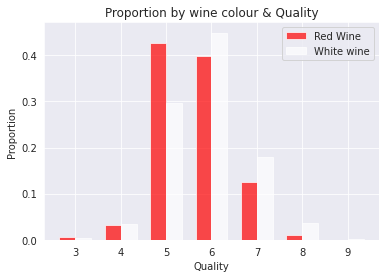

In [26]:
#Bar chart visualization for red and white wine
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportion, width, color = "w", alpha=0.7, label="White wine")
plt.xlabel("Quality")
plt.ylabel("Proportion")
plt.title("Proportion by wine colour & Quality")
locations = ind + width / 2
labels = ['3', '4', '5', '6', '7', '8', '9']
plt.xticks(locations, labels)
plt.legend()